**Для произвольного диффура dx = f(x,u,t) провести линеаризацию**

In [27]:
# Подключение библиотек
from sympy import *
from sympy.plotting import plot, plot3d
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Задание функции
x, u , t = symbols('x u t')
f = Function('f')(x, u, t)

# Будем проводить линеаризацию функции
f = x**2 + u**2 + t**2

# Производные функции f
df_dx = diff(f, x)
df_du = diff(f, u)
df_dt = diff(f, t)

# Точка линеаризации
x_0 = 1
u_0 = 1
t_0 = 1

# Вычисляем значения в точке линеаризации
f_0 = f.subs({x: x_0, u: u_0, t: t_0})
df_dx_0 = df_dx.subs({x: x_0, u: u_0, t: t_0})
df_du_0 = df_du.subs({x: x_0, u: u_0, t: t_0})
df_dt_0 = df_dt.subs({x: x_0, u: u_0, t: t_0})

# Линеаризированная функция имеет вид
f_l = f_0 + df_dx_0 * (x - x_0) + df_du_0 * (u - u_0) + df_dt_0 * (t - t_0)

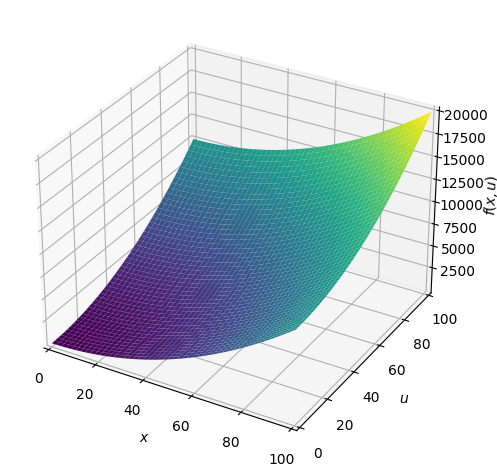

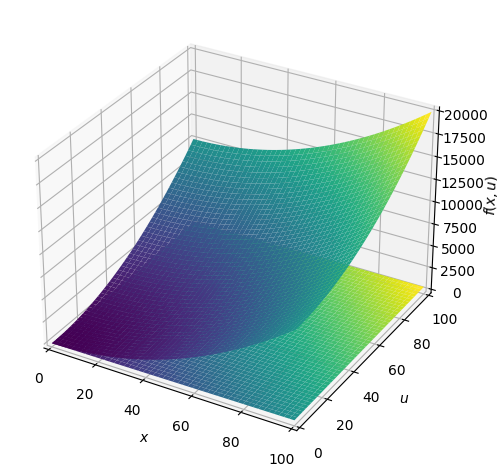

In [27]:
# график f(x, u, t) при t = 1 x = (0, 100) u = (0, 100)
f_sup = x**2 + u**2 + 1

p = plot3d(f_sup, (x, 0, 100), (u, 0 ,100))

# график линеаризованной f(x, u) при t = 1 x = (0, 100) u = (0, 100)
f_0_3d = f.subs({x: x_0, u: u_0, t: 1})
df_dx_0_3d = df_dx.subs({x: x_0, u: u_0, t: 1})
df_du_0_3d = df_du.subs({x: x_0, u: u_0, t: 1})
df_dt_0_3d = df_dt.subs({x: x_0, u: u_0, t: 1})

f_l_3d = f_0_3d + df_dx_0_3d * (x - x_0) + df_du_0_3d * (u - u_0)
p = plot3d(f_l_3d, f_sup,  (x, 0, 100), (u, 0 ,100))

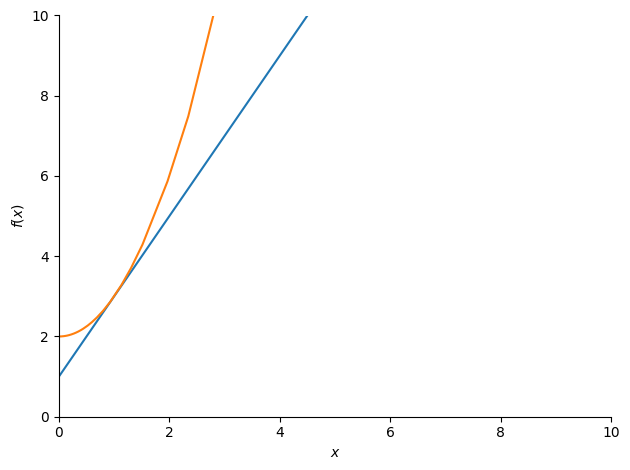

In [28]:
# график f(x) при t = 1 u = 1 x = (0, 100)
f_sup = x**2 + 1 + 1

# график линеаризованной f(x, u, t) при t = 1 u = 1 x = (0, 100)
f_0_3d = f.subs({x: x_0, u: 1, t: 1})
df_dx_0_3d = df_dx.subs({x: x_0, u: 1, t: 1})
df_du_0_3d = df_du.subs({x: x_0, u: 1, t: 1})
df_dt_0_3d = df_dt.subs({x: x_0, u: 1, t: 1})

f_l_3d = f_0_3d + df_dx_0_3d * (x - x_0)

p = plot(f_l_3d, f_sup, (x, 0, 100), xlim = (0, 10), ylim = (0, 10))

**Реализовать инерполяцию траектории с несколькими точками**

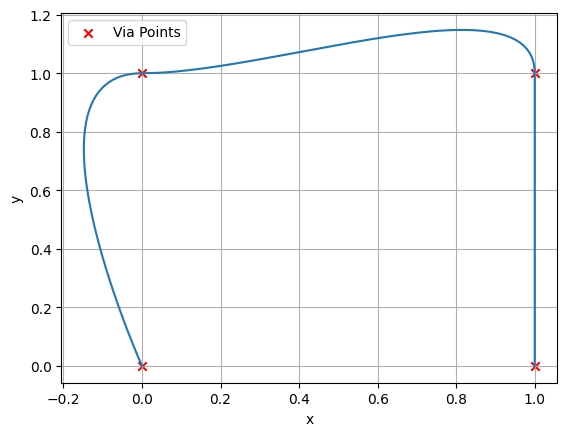

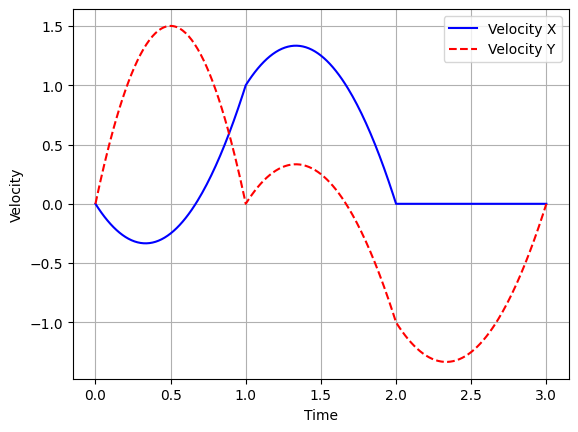

In [32]:
def coeff(via_points, velocities, times):
  coeff = []
  for i in range(len(via_points) - 1):
    delta_t = times[i + 1] - times[i]
    a0 = via_points[i]
    a1 = velocities[i]
    a2 = (3 * via_points[i + 1] - 3 * via_points[i] - 2 * velocities[i]*delta_t - velocities[i + 1] * delta_t) / (delta_t**2)
    a3 = (2 * via_points[i] + (velocities[i] + velocities[i + 1]) * delta_t - 2 * via_points[i + 1]) / (delta_t**3)
    coeff.append([a0, a1, a2, a3])
  return coeff

def interpolate(coeff, times, step = 0.01):
  position = []
  velocities = []
  time = []
  for i, j in enumerate(coeff):
    start, end = times[i], times[i + 1]
    while start < end:
      delta_t = start - times[i]
      pos = j[0] + j[1] * delta_t + j[2] * delta_t**2 + j[3] * delta_t**3
      vel = j[1] + 2 * j[2] * delta_t + 3 * j[3] * delta_t**2
      position.append(pos)
      velocities.append(vel)
      time.append(start)
      start = start + step
  return position, velocities, time



# Задаем параметры
via_points_x = [0, 0, 1, 1]
via_points_y = [0, 1, 1, 0]
velocities_x = [0, 1, 0, 0]
velocities_y = [0, 0, -1, 0]
times = [0, 1, 2, 3]

# Для каждой точки вычисляем коэффициенты полинома
coeff_x = coeff(via_points_x, velocities_x, times)
coeff_y = coeff(via_points_y, velocities_y, times)

# Проводим интерполяцию
x_values, x_velocities, _ = interpolate(coeff_x, times)
y_values, y_velocities, times = interpolate(coeff_y, times)

# Строим график
plt.plot(x_values, y_values, markersize=2)
plt.scatter(via_points_x, via_points_y, marker="x", label="Via Points", color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

plt.figure(2)
plt.plot(times, x_velocities, label="Velocity X", linestyle="-", color="blue")
plt.plot(times, y_velocities, label="Velocity Y", linestyle="--", color="red")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.grid()

**Интерполяцию траектории полиномом седьмого порядка**

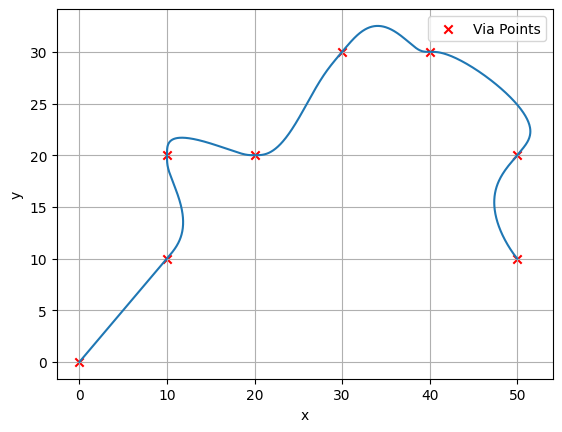

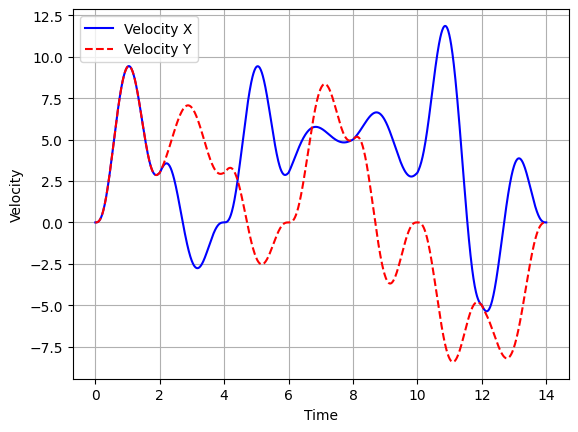

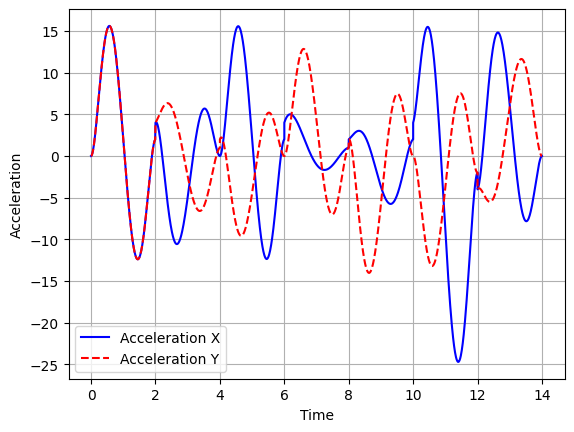

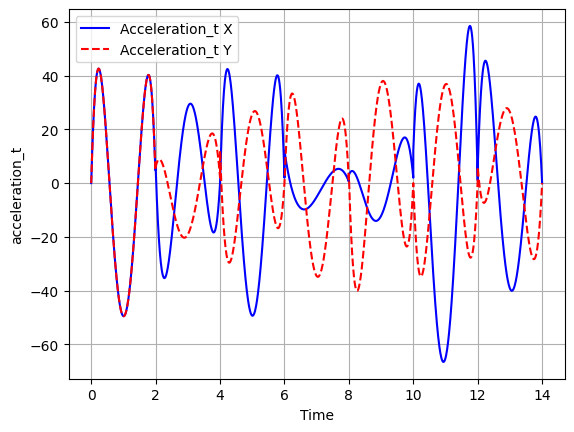

In [26]:
a4, a5, a6, a7 = symbols('a4 a5 a6 a7')
def coeff_f7(via_points, velocities, acceleration, acceleration_t, times):
  coeff = []
  for i in range(len(via_points) - 1):
    delta_t = times[i + 1] - times[i]
    a0 = via_points[i]
    a1 = velocities[i]
    a2 = acceleration[i]
    a3 = acceleration_t[i]
    a4_eq = Eq(a0 + a1 * delta_t + a2 * delta_t**2 + a3 * delta_t**3 + a4 * delta_t**4 + a5 * delta_t**5 + a6 * delta_t**6 + a7 * delta_t**7, via_points[i + 1])
    a5_eq = Eq(a1 + 2 * a2 * delta_t + 3 * a3 * delta_t**2 + 4 * a4 * delta_t**3 + 5 * a5 * delta_t**4 + 6 * a6 * delta_t**5 + 7 * a7 * delta_t**6, velocities[i + 1])
    a6_eq = Eq(2 * a2 + 6 * a3 * delta_t + 12 * a4 * delta_t**2 + 20 * a5 * delta_t**3 + 30 * a6 * delta_t**4 + 42 * a7 * delta_t**5, acceleration[i + 1])
    a7_eq = Eq(6 * a3 + 24 * a4 * delta_t + 60 * a5 * delta_t**2 + 120 * a6 * delta_t**3 + 210 * a7 * delta_t**4, acceleration_t[i + 1])
    eqs = [a4_eq, a5_eq, a6_eq, a7_eq]
    res = linsolve(eqs, (a4, a5, a6, a7))
    coeff.append([a0, a1, a2, a3, float(res.args[0][0]), float(res.args[0][1]), float(res.args[0][2]), float(res.args[0][3])])
  return coeff

def interpolate_f7(coeff, times, step = 0.01):
  position = []
  velocities = []
  acceleration = []
  acceleration_t = []
  time = []
  for i, j in enumerate(coeff):
    start, end = times[i], times[i + 1]
    while start < end:
      delta_t = start - times[i]
      pos = j[0] + j[1] * delta_t + j[2] * (delta_t**2) + j[3] * (delta_t**3) + j[4] * (delta_t**4) + j[5] * (delta_t**5) + j[6] * (delta_t**6) + j[7] * (delta_t**7)
      vel = j[1] + 2 * j[2] * delta_t + 3 * j[3] * delta_t**2 + 4 * j[4] * delta_t**3 + 5 * j[5] * delta_t**4 + 6 * j[6] * delta_t**5 + 7 * j[7] * delta_t**6
      acc = 2 * j[2] + 6 * j[3] * delta_t + 12 * j[4] * delta_t**2 + 20 * j[5] * delta_t**3 + 30 * j[6] * delta_t**4 + 42 * j[7] * delta_t**5
      acc_t = 6 * j[3] + 24 * j[4] * delta_t + 60 * j[5] * delta_t**2 + 120 * j[6] * delta_t**3 + 210 * j[7] * delta_t**4
      position.append(pos)
      velocities.append(vel)
      acceleration.append(acc)
      acceleration_t.append(acc_t)
      time.append(start)
      start = start + step
  return position, velocities, acceleration, acceleration_t, time

# Задаем параметры
via_points_x = [0, 10, 10, 20, 30, 40, 50, 50]
via_points_y = [0, 10, 20, 20, 30, 30, 20, 10]

velocities_x = [0, 3, 0, 3, 5, 3, -5, 0]
velocities_y = [0, 3, 3, 0, 5, 0, -5, 0]

acceleration_x = [0, 2, 0, 2, 1, 2, -2, 0]
acceleration_y = [0, 2, 1, 0, 1, 0, -2, 0]

acceleration_x_t = [0, 1, 0, 2, 0.5, 2, 1, 0]
acceleration_y_t = [0, 1, 2, 0, 0.5, 0, 1, 0]

times = [0, 2, 4, 6, 8, 10, 12, 14]

coeff_x_7 = coeff_f7(via_points_x, velocities_x, acceleration_x, acceleration_x_t,  times)
coeff_y_7 = coeff_f7(via_points_y, velocities_y, acceleration_y, acceleration_y_t,  times)

x_values, x_velocities, x_acceleration, x_acceleration_t, _ = interpolate_f7(coeff_x_7, times)
y_values, y_velocities, y_acceleration, y_acceleration_t, times = interpolate_f7(coeff_y_7, times)


plt.plot(x_values, y_values, markersize=2)
plt.scatter(via_points_x, via_points_y, marker="x", label="Via Points", color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

plt.figure(5)
plt.plot(times, x_velocities, label="Velocity X", linestyle="-", color="blue")
plt.plot(times, y_velocities, label="Velocity Y", linestyle="--", color="red")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.grid()

plt.figure(6)
plt.plot(times, x_acceleration, label="Acceleration X", linestyle="-", color="blue")
plt.plot(times, y_acceleration, label="Acceleration Y", linestyle="--", color="red")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.grid()

plt.figure(7)
plt.plot(times, x_acceleration_t, label="Acceleration_t X", linestyle="-", color="blue")
plt.plot(times, y_acceleration_t, label="Acceleration_t Y", linestyle="--", color="red")
plt.xlabel("Time")
plt.ylabel("acceleration_t")
plt.legend()
plt.grid()